# Import the mRNA expression data, calculate adjacency matrix using correlation between samples and build the network using NetworkX library


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
#import data
df=pd.read_table('GSE39582_Expression.tsv',sep='\t')
df.shape
dff=df.iloc[:10,:20]# this subdataframe will be used for the rest of the network building 

In [4]:
#compute the correléation between samples 
data_corr=dff.corr()
np.fill_diagonal(data_corr.values, 0)

In [5]:
#build the network using the correlation as adjacency matrix and save the network to graphml file
data_network = nx.to_networkx_graph(data_corr)
edges=data_network.edges()
degree= dict(data_network.degree(weight = "weight"))
pos=nx.spring_layout(data_network)
weights = [data_network[u][v]['weight'] for u,v in edges]
#nx.write_gml(data_network, "test1.graphml")

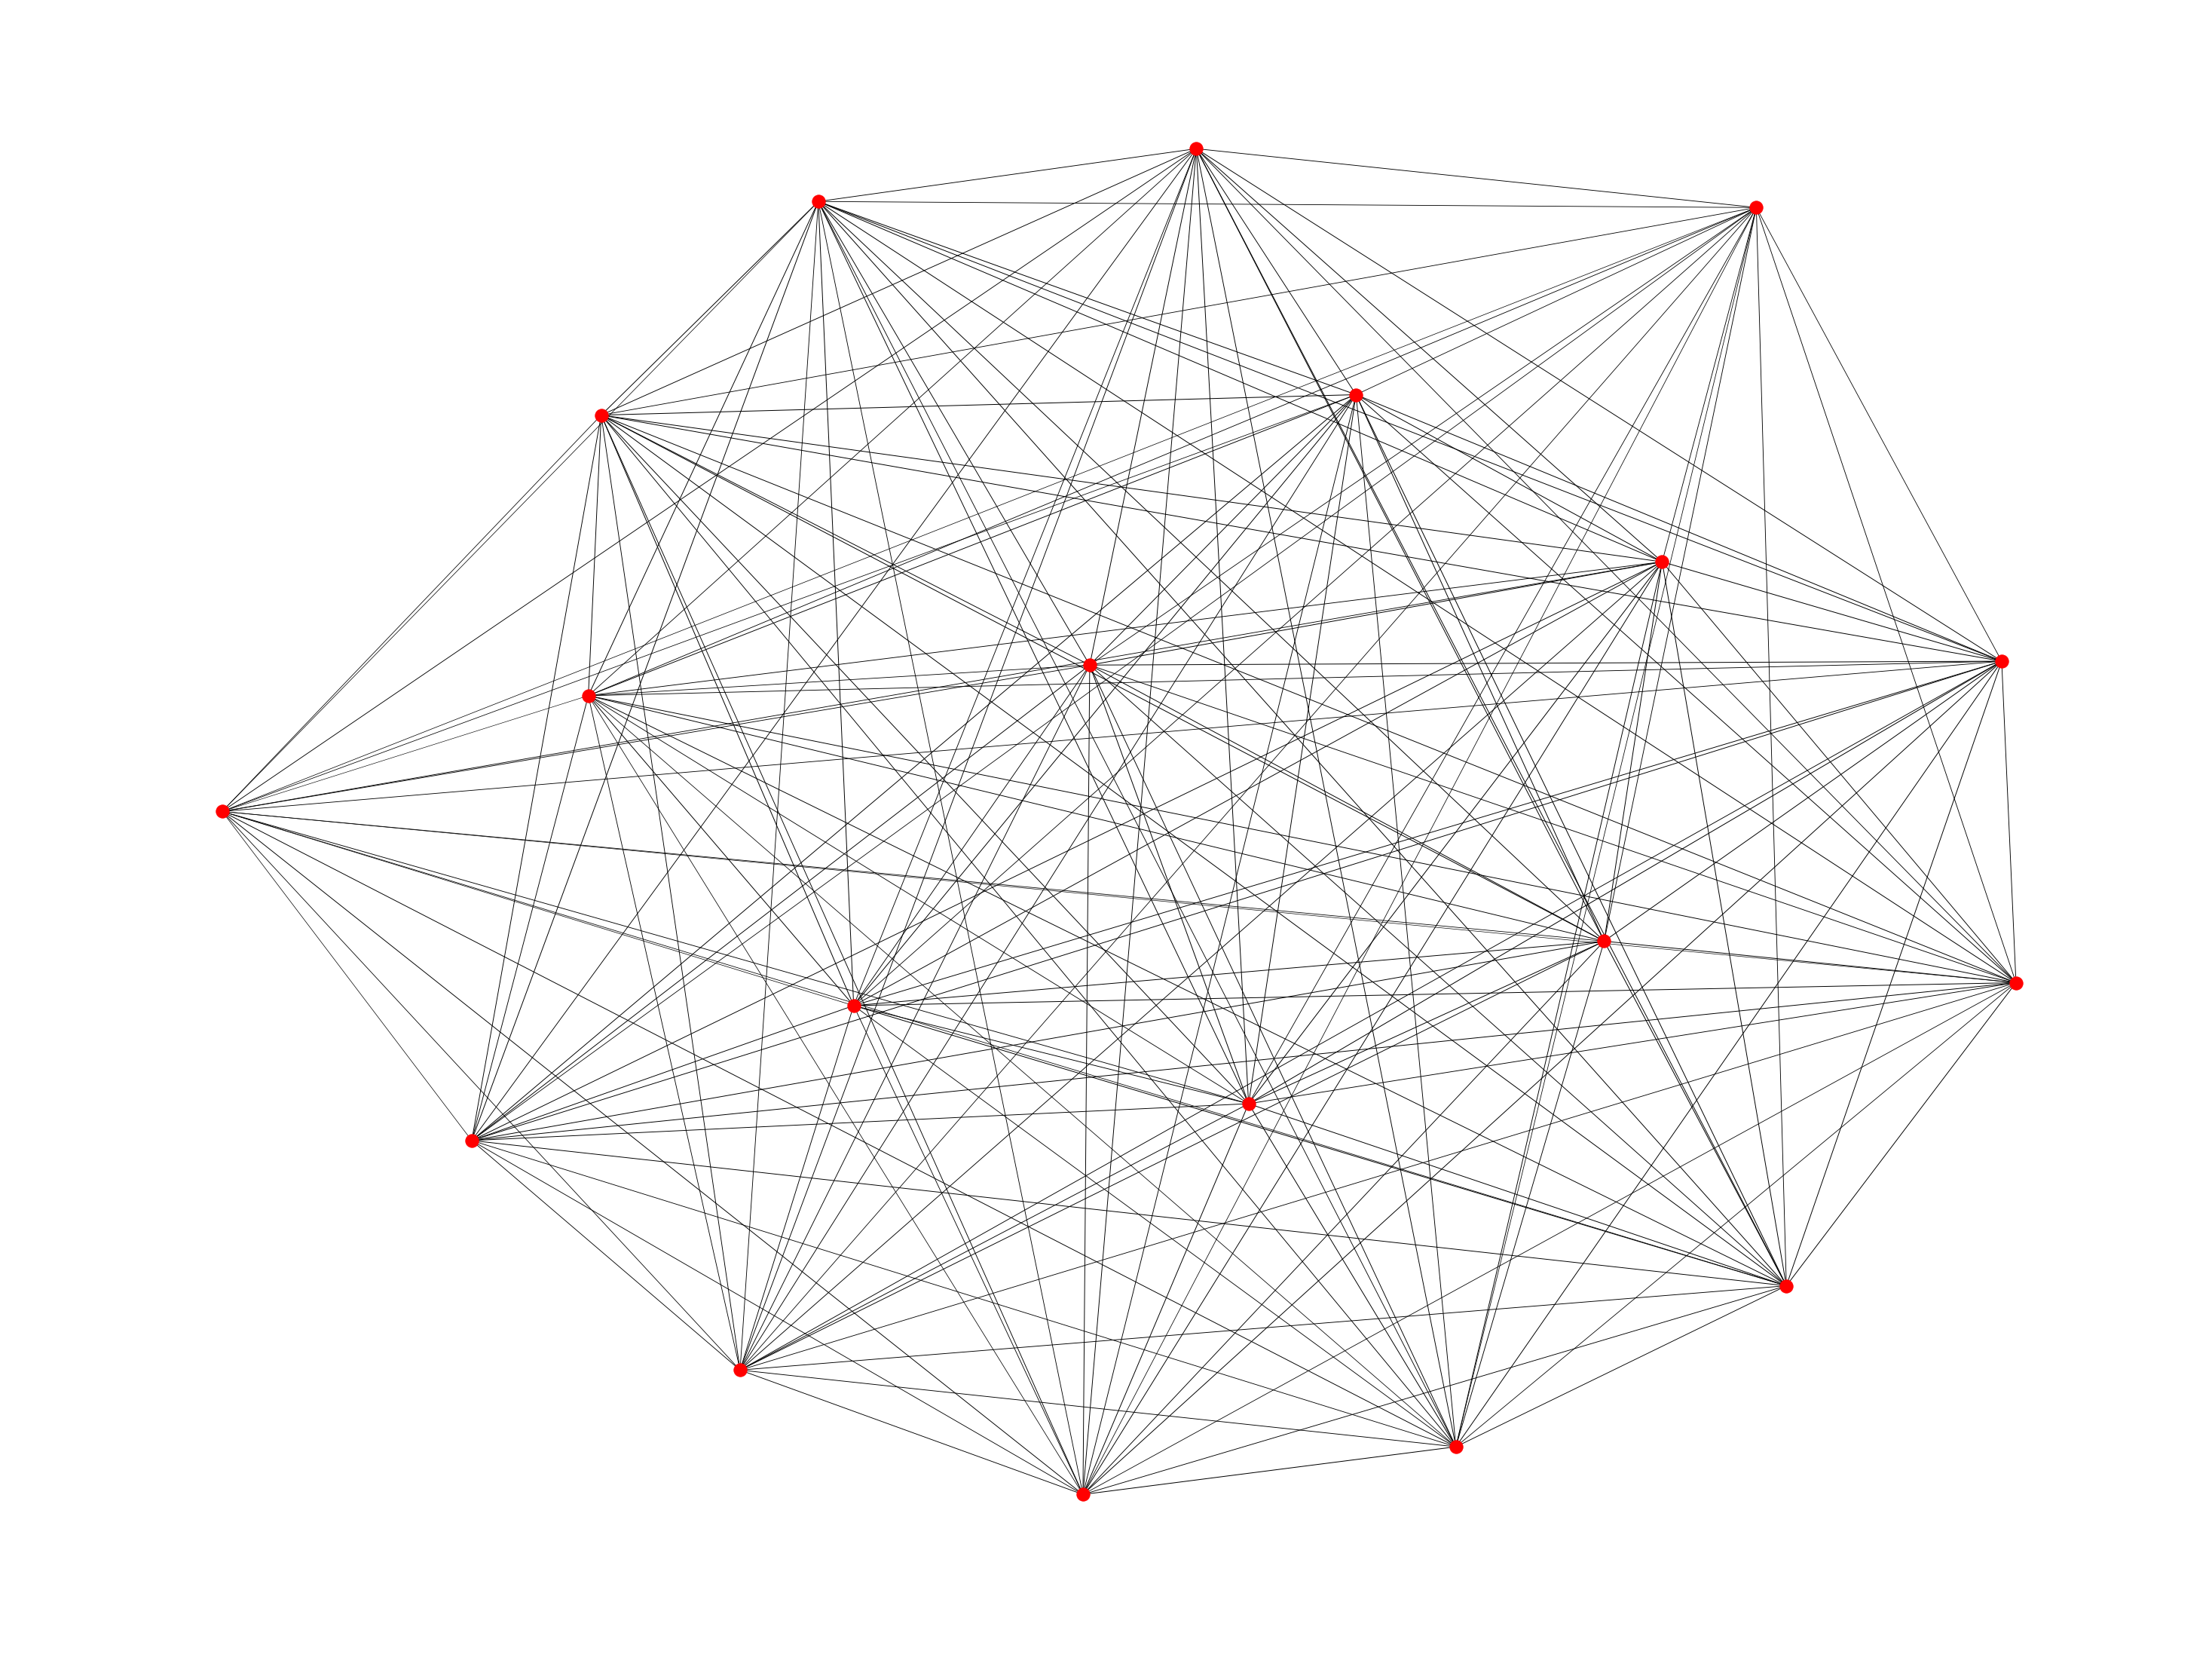

In [6]:
# Draw the nodes and edges using nx.draw
weight = [data_network[u][v]['weight'] for u,v in edges]
plt.rcParams["figure.figsize"] = (40,30)
nx.draw(data_network, pos, edges=edges, width=weight)
plt.show()
#plt.savefig('myfig1')

In [158]:
#drow the network nodes than the edges
weights = [data_network[u][v]['weight'] for u,v in edges]
nx.draw_networkx_nodes(data_network,pos, node_color='red', node_size=100, alpha=0.3)
nx.draw_networkx_edges(data_network,pos,width= weights,alpha=0.3)
plt.rcParams["figure.figsize"] = (40,30)
#nx.draw(data_network, pos, edges=edges, width=weights)
#plt.show()
plt.savefig('myfig2')

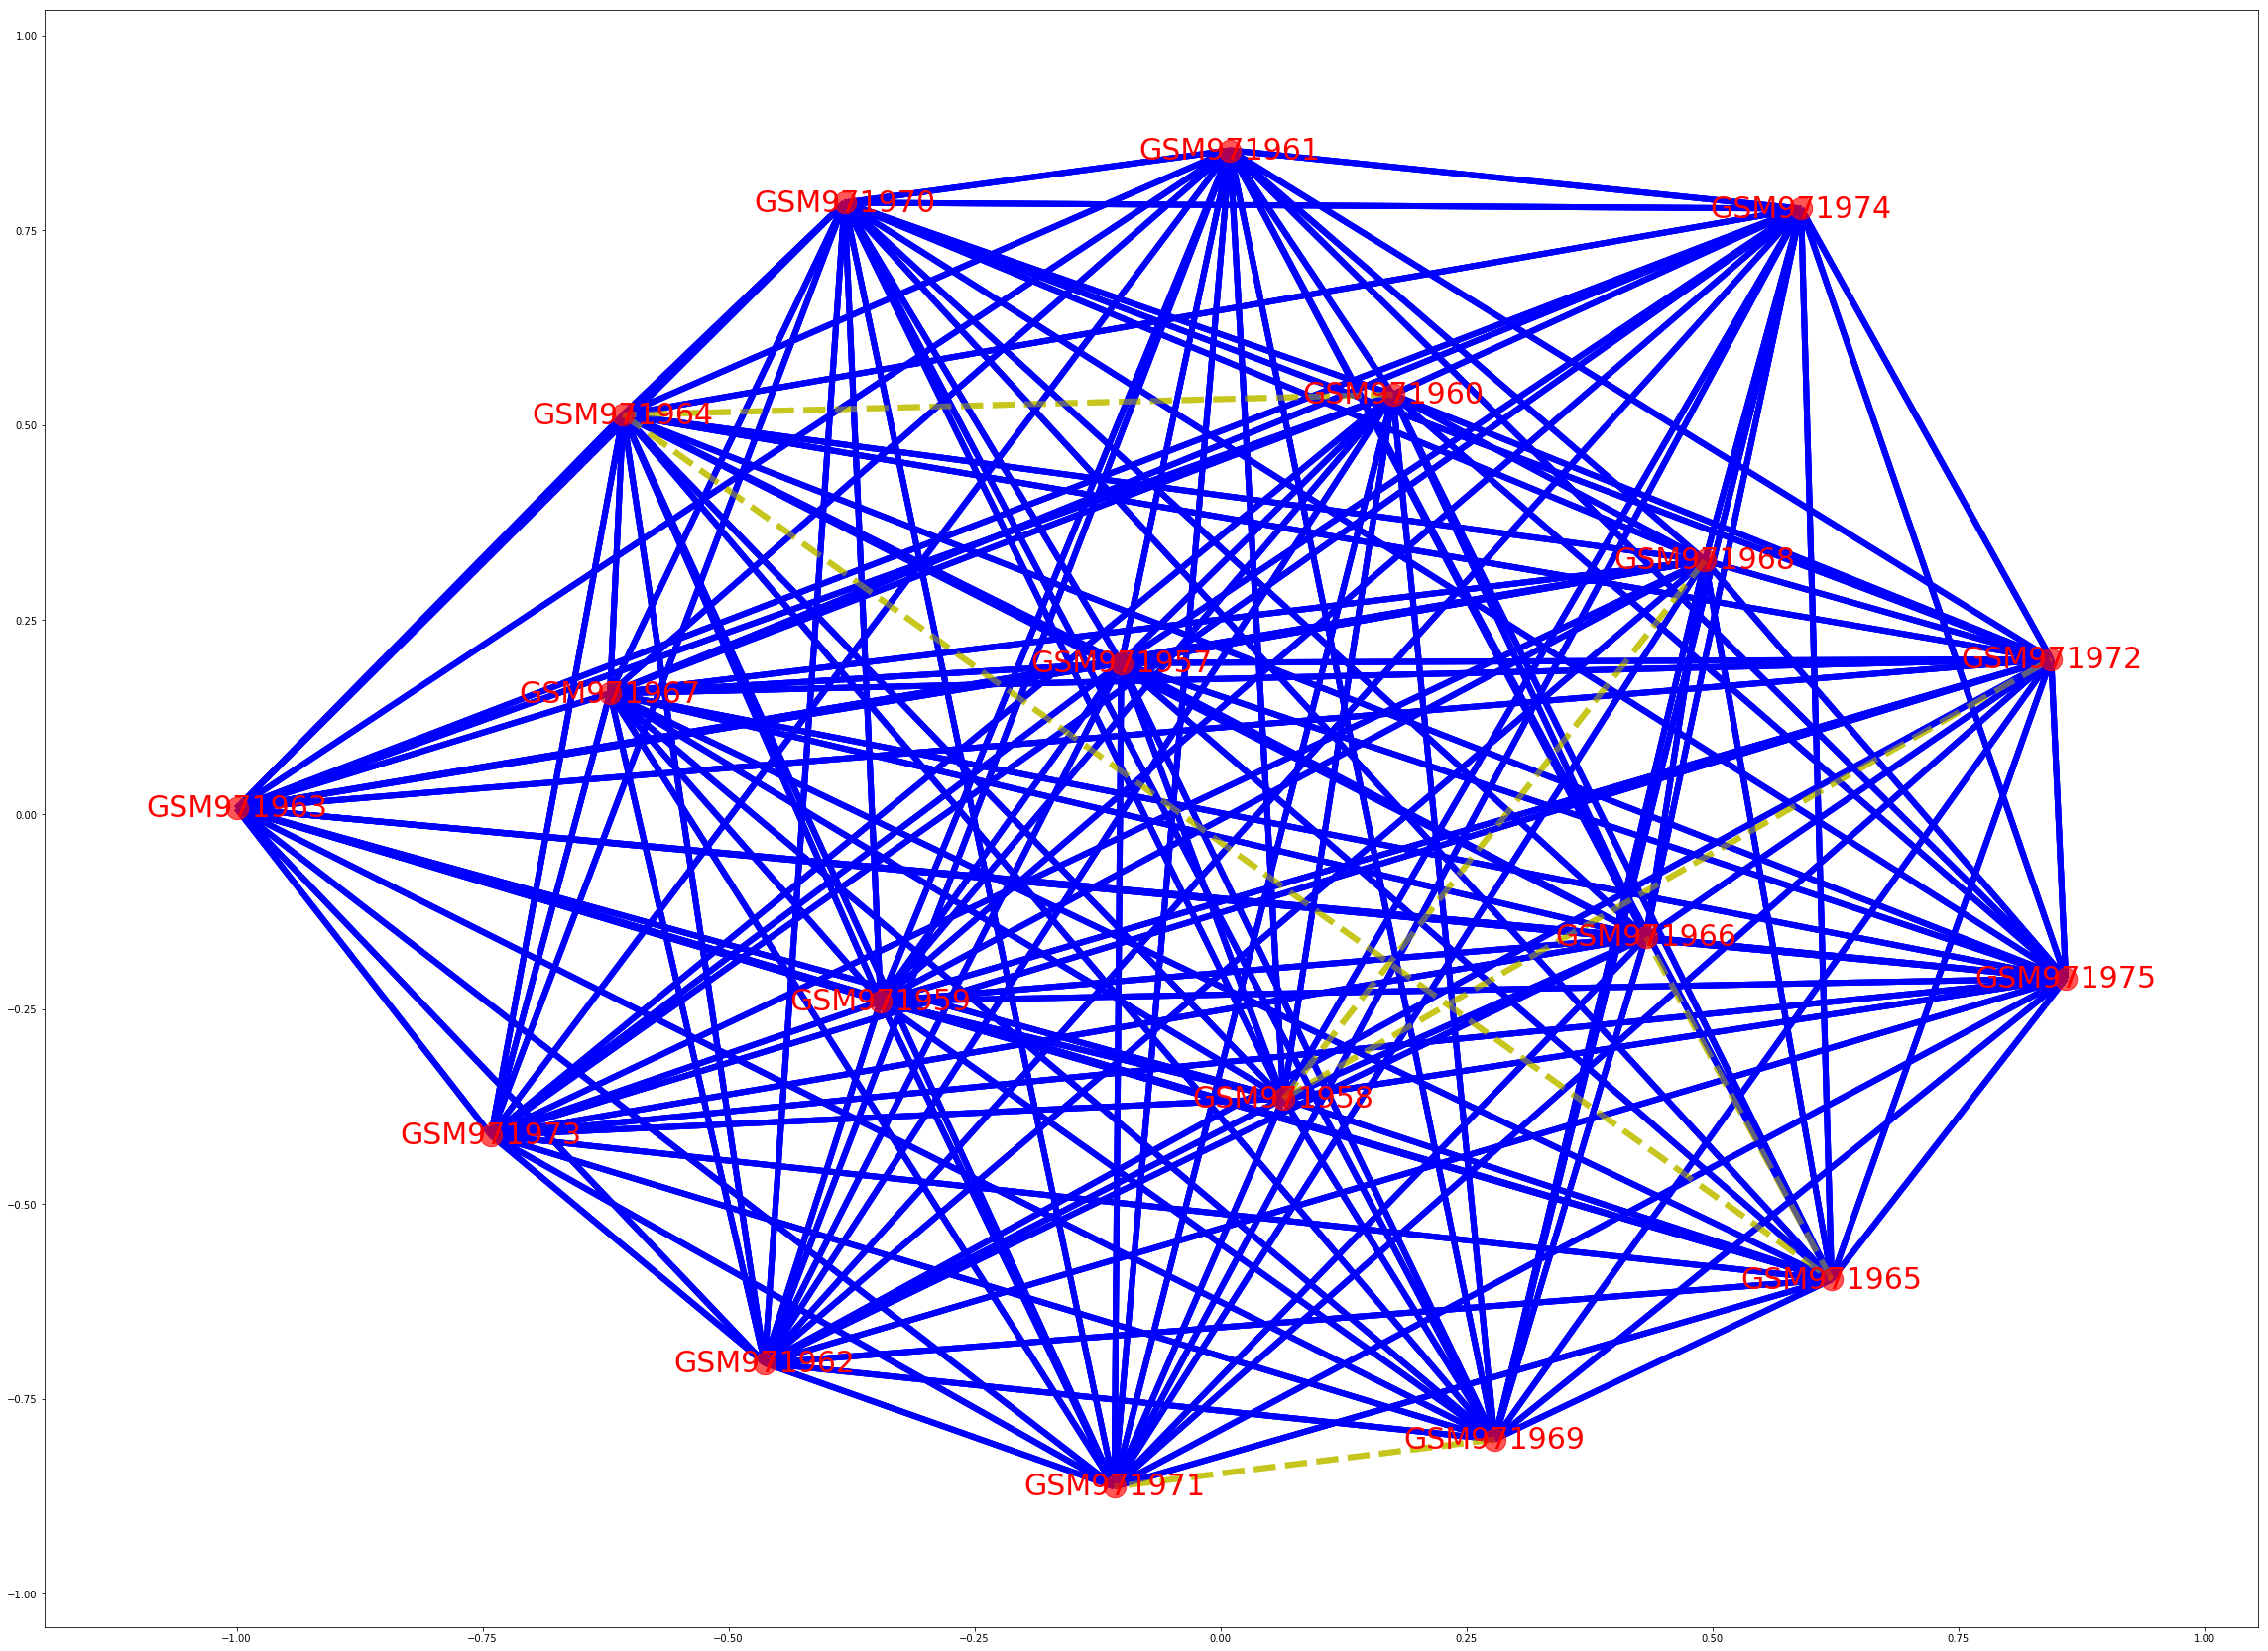

In [10]:
#make different style based on weights
 
elarge=[(u,v) for (u,v,d) in data_network.edges(data=True) if d['weight'] <0.99]
esmall=[(u,v) for (u,v,d) in data_network.edges(data=True) if d['weight'] >=0.99]

nx.draw_networkx_nodes(data_network,pos, node_color='red', node_size=500, alpha=0.3)

nx.draw_networkx_edges(data_network,pos,edgelist=elarge,edge_color='blue',
                    width=6)
nx.draw_networkx_edges(data_network,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='y',style='dashed')
labels=data_network.nodes()
label={}
for l in labels:
    label[l]=l
nx.draw_networkx_labels(data_network, pos, labels=label,font_size=30,font_color='red')

plt.rcParams["figure.figsize"] = (40,30)
#nx.draw(data_network, pos, edges=edges, width=weights)
plt.show()
#plt.savefig('myfig3')